# 셀프 주유소는 정말 저렴할까

## Selenium 사용하기

In [1]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome('../driver/chromedriver')
driver.get('https://naver.com')

In [3]:
driver.save_screenshot('../images/001.png')

True

### 로그인 하기

In [4]:
import os
import json

BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
CONF_DIR = os.path.join(BASE_DIR, '.secret')
CONF_FILE = json.loads(open(os.path.join(CONF_DIR, 'key.json')).read())

id = CONF_FILE['naver']['id']
pw = CONF_FILE['naver']['pw']

In [5]:
elem_login = driver.find_element_by_id('id')
elem_login.clear()
elem_login.send_keys(id)

elem_login = driver.find_element_by_id('pw')
elem_login.clear()
elem_login.send_keys(pw)

In [6]:
xpath = '//*[@id="frmNIDLogin"]/fieldset/span/input'
driver.find_element_by_xpath(xpath).click()

보이는 웹 페이지 내용을 XML 언어의 형식으로 보여주는 기법으로 웹 페이지의 모든 내용을 XPath로 접근 가능한 위치 정보를 확인.  
`find_element_by_xpath` 명령으로 로그인 버튼의 위치를 알아내고, 그 뒤에  `click()`으로 클릭하는 효과를 줄 수 있다.

In [7]:
driver.get('https://mail.naver.com')

In [8]:
from bs4 import BeautifulSoup as bs

html = driver.page_source
soup = bs(html, 'html.parser')

In [9]:
raw_list = soup.find_all('div', 'name _ccr(lst.from) ')
raw_list

[<div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|624) _stopDefault" href="#" title='"네이버" &lt;help@naver.com&gt;'>네이버</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|622) _stopDefault" href="#" title='"네이버" &lt;webmaster@naver.com&gt;'>네이버</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|614) _stopDefault" href="#" title='"Apple" &lt;appleid@id.apple.com&gt;'>Apple</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|613) _stopDefault" href="#" title='"Apple" &lt;appleid@id.apple.com&gt;'>Apple</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|611) _stopDefault" href="#" title='"Drop

In [10]:
send_list = [raw_list[n].find('a').get_text() for n in range(0, len(raw_list))]
send_list

['네이버',
 '네이버',
 'Apple',
 'Apple',
 'Dropbox',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'moyawebios@naver..',
 'Apple',
 'Find My iPhone',
 '임예리']

In [11]:
driver.close()

## 서울시 구별 주유소 가격 정보 얻기

In [27]:
driver = webdriver.Chrome('../driver/chromedriver')
driver.get('http://www.opinet.co.kr/searRgSelect.do')

In [28]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name('option')

셀렉트 박스 '시/구/군'을 크롬의 개발자 도구로 클릭하여 XPath를 복사한다.

In [29]:
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [30]:
element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[0])

In [31]:
# 조회 버튼
xpath = """//*[@id="searRgSelect"]"""
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [32]:
# 엑셀 저장 버튼
xpath = """//*[@id="glopopd_excel"]"""
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [33]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

In [34]:
driver.close()

## 구별 주유 가격에 대한 데이터의 정리

In [35]:
import pandas as pd
from glob import glob

In [37]:
glob('../data/지역*.xls')

['../data/지역_위치별(주유소) (1).xls',
 '../data/지역_위치별(주유소) (10).xls',
 '../data/지역_위치별(주유소) (11).xls',
 '../data/지역_위치별(주유소) (12).xls',
 '../data/지역_위치별(주유소) (13).xls',
 '../data/지역_위치별(주유소) (14).xls',
 '../data/지역_위치별(주유소) (15).xls',
 '../data/지역_위치별(주유소) (16).xls',
 '../data/지역_위치별(주유소) (17).xls',
 '../data/지역_위치별(주유소) (18).xls',
 '../data/지역_위치별(주유소) (19).xls',
 '../data/지역_위치별(주유소) (2).xls',
 '../data/지역_위치별(주유소) (20).xls',
 '../data/지역_위치별(주유소) (21).xls',
 '../data/지역_위치별(주유소) (22).xls',
 '../data/지역_위치별(주유소) (23).xls',
 '../data/지역_위치별(주유소) (24).xls',
 '../data/지역_위치별(주유소) (3).xls',
 '../data/지역_위치별(주유소) (4).xls',
 '../data/지역_위치별(주유소) (5).xls',
 '../data/지역_위치별(주유소) (6).xls',
 '../data/지역_위치별(주유소) (7).xls',
 '../data/지역_위치별(주유소) (8).xls',
 '../data/지역_위ᄎ

In [39]:
stations_files = glob('../data/지역*.xls')
stations_files

['../data/지역_위치별(주유소) (1).xls',
 '../data/지역_위치별(주유소) (10).xls',
 '../data/지역_위치별(주유소) (11).xls',
 '../data/지역_위치별(주유소) (12).xls',
 '../data/지역_위치별(주유소) (13).xls',
 '../data/지역_위치별(주유소) (14).xls',
 '../data/지역_위치별(주유소) (15).xls',
 '../data/지역_위치별(주유소) (16).xls',
 '../data/지역_위치별(주유소) (17).xls',
 '../data/지역_위치별(주유소) (18).xls',
 '../data/지역_위치별(주유소) (19).xls',
 '../data/지역_위치별(주유소) (2).xls',
 '../data/지역_위치별(주유소) (20).xls',
 '../data/지역_위치별(주유소) (21).xls',
 '../data/지역_위치별(주유소) (22).xls',
 '../data/지역_위치별(주유소) (23).xls',
 '../data/지역_위치별(주유소) (24).xls',
 '../data/지역_위치별(주유소) (3).xls',
 '../data/지역_위치별(주유소) (4).xls',
 '../data/지역_위치별(주유소) (5).xls',
 '../data/지역_위치별(주유소) (6).xls',
 '../data/지역_위치별(주유소) (7).xls',
 '../data/지역_위치별(주유소) (8).xls',
 '../data/지역_위ᄎ

stations_files 변수에 각 엑셀 파일의 경로와 이름을 리스트로 저장

In [40]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

`read_excel`로 각 파일을 반복문을 이용해서 읽은 후 `tmp_raw` 변수에 append 시킴.  
반복문이 끝나면 `concat`으로 쉽게 하나로 합칠 수 있다.

In [41]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 0 to 18
Data columns (total 10 columns):
지역       521 non-null object
상호       521 non-null object
주소       521 non-null object
상표       521 non-null object
전화번호     521 non-null object
셀프여부     521 non-null object
고급휘발유    521 non-null object
휘발유      521 non-null object
경유       521 non-null object
실내등유     521 non-null object
dtypes: object(10)
memory usage: 44.8+ KB


521개의 주유소 정보가 저장되었음.  
가격 정보가 숫자(int, float)가 아니기 때문에 후처리가 필요.

In [42]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),S-OIL,02-907-5182,Y,-,1537,1337,-
1,서울특별시,(주)에프알엔디 직영 송정주유소,서울특별시 강북구 인수봉로 185 (수유동),SK에너지,02-993-5189,N,-,1563,1363,1000
2,서울특별시,현대오일뱅크(주)직영 미아셀프주유소,서울특별시 강북구 도봉로 200 (미아동),현대오일뱅크,02-945-7999,Y,-,1566,1366,-
3,서울특별시,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),GS칼텍스,02-902-9470,Y,-,1566,1366,1000
4,서울특별시,현대오일뱅크(주)직영 번동셀프주유소,서울 강북구 한천로 963 (번동),현대오일뱅크,02-992-3331,Y,-,1577,1377,-


In [43]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                               '주소':station_raw['주소'],
                               '가격':station_raw['휘발유'],
                               '셀프':station_raw['셀프여부'],
                               '상표':station_raw['상표']})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1537,Y,S-OIL
1,(주)에프알엔디 직영 송정주유소,서울특별시 강북구 인수봉로 185 (수유동),1563,N,SK에너지
2,현대오일뱅크(주)직영 미아셀프주유소,서울특별시 강북구 도봉로 200 (미아동),1566,Y,현대오일뱅크
3,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1566,Y,GS칼텍스
4,현대오일뱅크(주)직영 번동셀프주유소,서울 강북구 한천로 963 (번동),1577,Y,현대오일뱅크


추가로 주소에서 '구' 이름만 추출하여 구별 주유 가격 비교

In [44]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1537,Y,S-OIL,강북구
1,(주)에프알엔디 직영 송정주유소,서울특별시 강북구 인수봉로 185 (수유동),1563,N,SK에너지,강북구
2,현대오일뱅크(주)직영 미아셀프주유소,서울특별시 강북구 도봉로 200 (미아동),1566,Y,현대오일뱅크,강북구
3,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1566,Y,GS칼텍스,강북구
4,현대오일뱅크(주)직영 번동셀프주유소,서울 강북구 한천로 963 (번동),1577,Y,현대오일뱅크,강북구


head만 조사했을때는 이상이 없어 보이지만, 5백여개나 되는 데이터를 다 보기에는 무리.  
`unique()`으로 검사.

In [45]:
stations['구'].unique()

array(['강북구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '서울특별시', '성북구',
       '송파구', '양천구', '영등포구', '강서구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강남구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '특별시', '강동구'],
      dtype=object)

'서울특별시', '특별시'는 구가 아닌데도 들어 있음을 확인.

In [46]:
stations[stations['구']=='서울특별시']

,Oil_store,주소,가격,셀프,상표,구
11,SK네트웍스(주)효진주유소,1 서울특별시 성동구 동일로 129 (성수동2가),1729,N,SK에너지,서울특별시


서울특별시를 확인해보면 처음부터 주소가 입력될 때 알 수 없는 글자 하나가 들어가서 칸 수가 맞지 않았음.

In [47]:
stations.loc[stations['구']=='서울특별시', '구'] = '성동구'
stations['구'].unique()

array(['강북구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강서구', '용산구', '은평구', '종로구', '중구', '중랑구', '강남구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '특별시', '강동구'],
      dtype=object)

예외 상황으로 보고 직접 변경

In [49]:
stations[stations['구']=='특별시']

,Oil_store,주소,가격,셀프,상표,구
13,서현주유소,서울 특별시 도봉구 방학로 142 (방학동),1628,Y,S-OIL,특별시


서울특별시가 아니라 서울 특별시로 띄어쓰기로 인해 예외 발생

In [50]:
# 예외 처리
stations.loc[stations['구']=='특별시', '구'] = '도봉구'
stations['구'].unique()

array(['강북구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강서구', '용산구', '은평구', '종로구', '중구', '중랑구', '강남구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강동구'], dtype=object)

In [51]:
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
13,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
25,목동주유소,서울 양천구 목동중앙로 125 (목동),-,N,S-OIL,양천구
34,하나주유소,서울특별시 영등포구 도림로 236 (신길동),-,N,S-OIL,영등포구
34,하이웨이주유소,서울 강서구 공항대로 432 (화곡동),-,N,S-OIL,강서구
8,자하문주유소,서울 종로구 자하문로 248 (부암동),-,N,SK에너지,종로구
17,형제주유소,서울 관악구 남부순환로 1520 (신림동),-,N,S-OIL,관악구
18,명진석유(주)동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),-,Y,GS칼텍스,강동구


가격이 기록된 컬럼이 숫자형이 아니다. 가격이 기록되지 않은 경우 '-'문자를 기입함.  
가격 정보를 기입하지 않은 주유소는 제외(일일이 확인할 수 없기 때문)

In [53]:
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1537,Y,S-OIL,강북구
1,(주)에프알엔디 직영 송정주유소,서울특별시 강북구 인수봉로 185 (수유동),1563,N,SK에너지,강북구
2,현대오일뱅크(주)직영 미아셀프주유소,서울특별시 강북구 도봉로 200 (미아동),1566,Y,현대오일뱅크,강북구
3,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1566,Y,GS칼텍스,강북구
4,현대오일뱅크(주)직영 번동셀프주유소,서울 강북구 한천로 963 (번동),1577,Y,현대오일뱅크,강북구


In [54]:
# 가격을 숫자형으로 변환
stations['가격'] = [float(value) for value in stations['가격']]

In [55]:
stations.reset_index(inplace=True)
del stations['index']

In [56]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 6 columns):
Oil_store    514 non-null object
주소           514 non-null object
가격           514 non-null float64
셀프           514 non-null object
상표           514 non-null object
구            514 non-null object
dtypes: float64(1), object(5)
memory usage: 24.2+ KB


## 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

In [57]:
# 한글 문제를 해결

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Unknow system...')

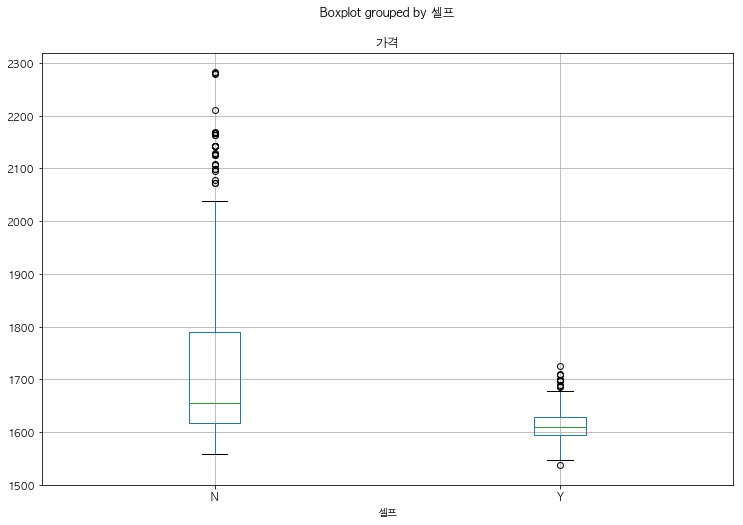

In [58]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

boxplot로 간편하게 셀프 컬럼을 기준으로 가격 분포를 확인.  
전반적으로 셀프 주유소가 가격이 낮게 되어 있음

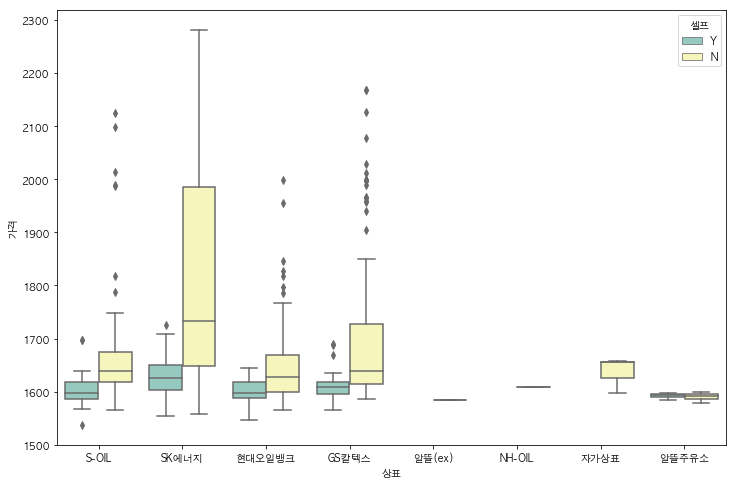

In [59]:
# 상표별로 셀프주유소 확인
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

상표 상관없이 모든 셀프주유소가 저렴하지만, sk에너지가 그중 가격대가 가장 높다.

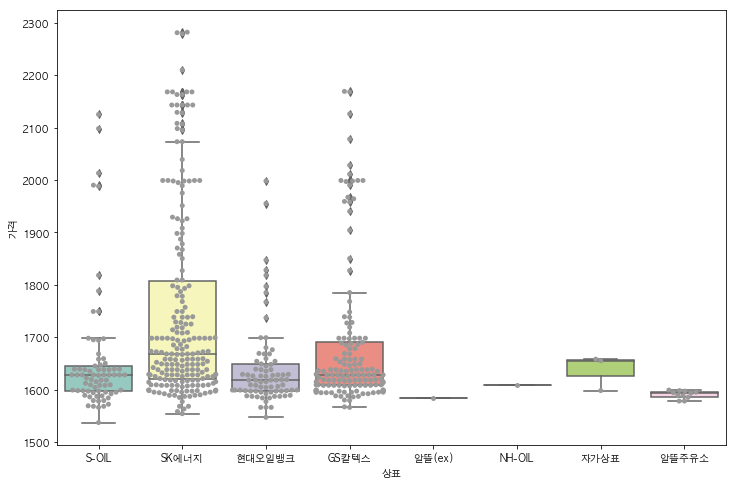

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.6')
plt.show()

`swarmplot`을 같이 그려보면 좀 더 확실한 데이터 분포를 볼 수 있음.  

## 서울시 구별 주유 가격 확인하기

In [61]:
# 지도를 그리기 위한 모듈 import
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [62]:
# 가장 비싼 지역
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
330,서남주유소,서울 중구 통일로 30 (봉래동1가),2282.0,N,SK에너지,중구
329,장충주유소,서울 중구 장충단로 202 (장충동1가),2281.0,N,SK에너지,중구
112,양재주유소,서울 서초구 바우뫼로 178 (양재동),2279.0,N,SK에너지,서초구
391,뉴서울(강남),서울 강남구 언주로 716 (논현동),2210.0,N,SK에너지,강남구
328,필동주유소,서울특별시 중구 퇴계로 196 (필동2가),2169.0,N,GS칼텍스,중구
291,한남지점,서울 용산구 한남대로21길 4 (한남동),2168.0,N,SK에너지,용산구
327,주)중앙에너비스 퇴계로지점,서울특별시 중구 퇴계로 228 (필동2가),2168.0,N,SK에너지,중구
292,에너비스,서울 용산구 한남대로21길 4 (한남동),2168.0,N,SK에너지,용산구
317,(주)대양씨앤씨,서울 종로구 사직로 65 (사직동),2168.0,N,GS칼텍스,종로구
318,(주)중앙에너비스혜화주유소,서울 종로구 창경궁로35길 1 (혜화동),2168.0,N,SK에너지,종로구


In [63]:
# 가장 저렴한 지역
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
0,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1537.0,Y,S-OIL,강북구
293,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1547.0,Y,현대오일뱅크,은평구
294,타이거주유소,서울 은평구 수색로 188 (증산동),1554.0,Y,SK에너지,은평구
426,풀페이주유소,서울특별시 구로구 경인로 41 (온수동),1558.0,N,SK에너지,구로구
1,(주)에프알엔디 직영 송정주유소,서울특별시 강북구 인수봉로 185 (수유동),1563.0,N,SK에너지,강북구
2,현대오일뱅크(주)직영 미아셀프주유소,서울특별시 강북구 도봉로 200 (미아동),1566.0,Y,현대오일뱅크,강북구
3,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1566.0,Y,GS칼텍스,강북구
478,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1566.0,N,현대오일뱅크,도봉구
479,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),1566.0,N,현대오일뱅크,도봉구
409,대원주유소,서울 광진구 용마산로 122 (중곡동),1566.0,N,S-OIL,광진구


In [64]:
# pivot_table을 이용해 구별 가격 정보를 변경  및 평균값으로 정리
import numpy as np
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'],
                        aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1842.325581
강동구,1696.500000
강북구,1580.300000
강서구,1640.411765
관악구,1650.411765


In [68]:
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5,
                tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
              data = gu_data,
              columns=[gu_data.index, '가격'],
              fill_color='PuRd',
              key_on='feature.id')
map

서울시 구별 정보에 대해 지도로 표현.  
평균적으로 중구, 중랑구 서초구, 강남구가 가격이 높음